In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
james = pd.read_csv("../data/new_ai/training_log.csv")
ben = pd.read_csv("../data/new_ai_750/training_log.csv")
jeff = pd.read_csv("../data/old_ai/training_log.csv")
nakul = pd.read_csv("../data/old_ai_750/training_log.csv")

In [3]:
james['Running Total'] = james['Total Reward'].cumsum()
ben['Running Total'] = ben['Total Reward'].cumsum()
jeff['Running Total'] = jeff['Total Reward'].cumsum()
nakul['Running Total'] = nakul['Total Reward'].cumsum()

In [8]:
james.tail(20)

,Episode,Total Reward,Average Loss,Epsilon,Running Total,hostname
155238,155238,10.50,0.118887,0.179272,-36517.75,james
155239,155239,-10.00,0.106276,0.179271,-36527.75,james
155240,155240,-10.00,0.087870,0.179269,-36537.75,james
155241,155241,-10.00,0.115300,0.179267,-36547.75,james
155242,155242,10.00,0.098294,0.179266,-36537.75,james
155243,155243,-10.00,0.089197,0.179264,-36547.75,james
155244,155244,-10.00,0.119328,0.179262,-36557.75,james
155245,155245,-10.00,0.106221,0.179261,-36567.75,james
155246,155246,-10.00,0.095418,0.179259,-36577.75,james
155247,155247,-10.00,0.133464,0.179258,-36587.75,james


In [5]:
#add hostname
james['hostname'] = 'james'
ben['hostname'] = 'ben'
jeff['hostname'] = 'jeff'
nakul['hostname'] = 'nakul'

In [6]:
df = pd.concat([james, ben, jeff, nakul], ignore_index=True)

In [31]:
df.sample(20)

,Episode,Total Reward,Average Loss,Epsilon,Running Total,hostname
249257,95174,10.25,0.249311,0.323888,-21717.00,ben
127088,127088,-10.00,0.123482,0.233790,-23633.50,james
278474,124391,-9.50,0.107861,0.240092,-33635.25,ben
112010,112010,10.00,0.250889,0.271910,-18333.25,james
310226,9382,0.50,0.128755,0.850407,-11497.25,jeff
22453,22453,10.75,0.572707,0.729755,-3994.75,james
12413,12413,-10.00,0.397309,0.820648,-2879.50,james
483935,37822,-10.00,0.445895,0.610943,-52924.25,nakul
220702,66619,10.25,0.315438,0.441372,-11506.75,ben
564512,118399,10.50,0.076282,0.254876,-152284.50,nakul


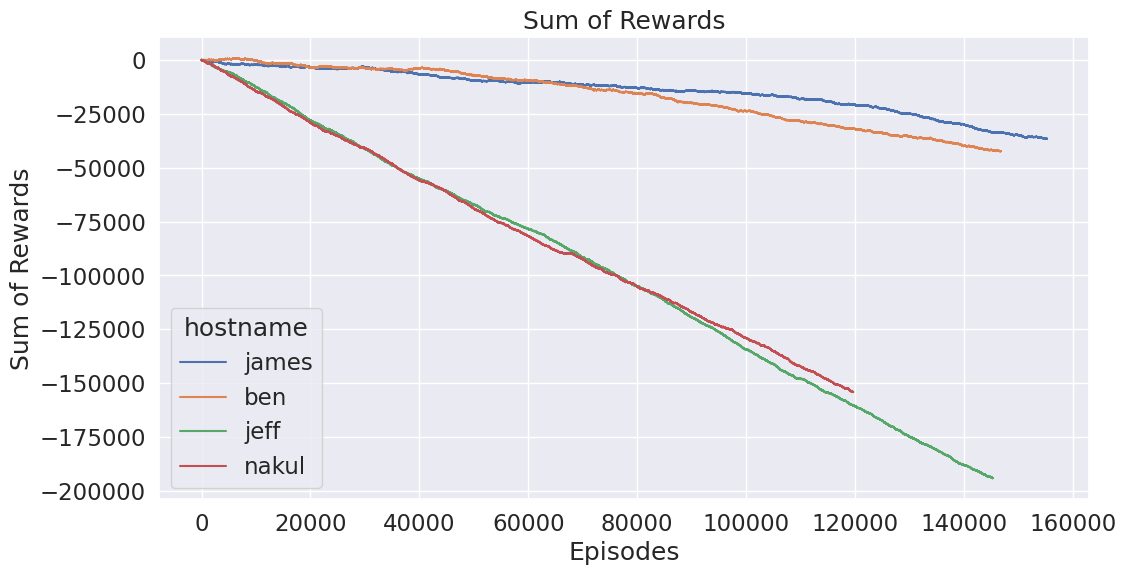

In [7]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.5)
sns.lineplot(data=df, x='Episode', y='Running Total', hue='hostname')
plt.title('Sum of Rewards')
plt.xlabel('Episodes')
plt.ylabel('Sum of Rewards')
plt.show()

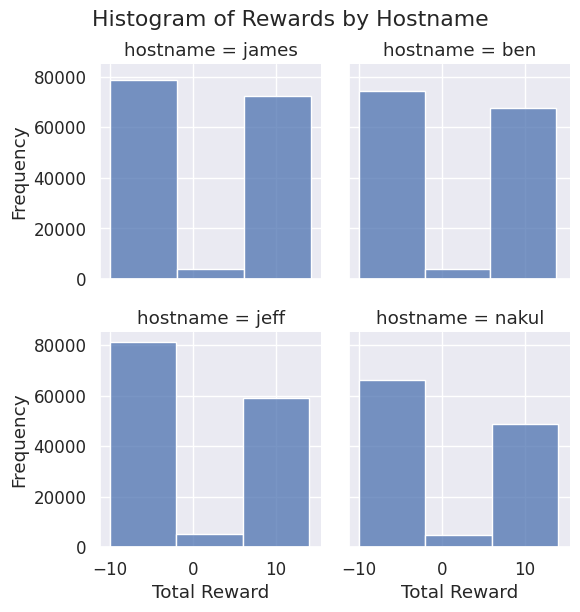

In [9]:
#increase text size
sns.set(font_scale=1.1)
# Create separate histograms for each hostname using Seaborn's FacetGrid
g = sns.FacetGrid(df, col='hostname', col_wrap=2)
g.map(sns.histplot, 'Total Reward', bins=3)

# Set labels and title
g.set_axis_labels('Total Reward', 'Frequency')
plt.suptitle('Histogram of Rewards by Hostname', y=1.02)

# Show the plot
plt.show()